In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_credit= pd.read_csv('/content/drive/MyDrive/week8-9/creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

In [5]:
columns = df_credit.columns[:-1]
preprocess = ColumnTransformer([
    ('scaler', StandardScaler(),columns)
])
log_reg = Pipeline([
    ('prepeocessor', preprocess),
    ('model', LogisticRegression())
])
dec_tre = Pipeline([
    ('prepeocessor', preprocess),
    ('model', DecisionTreeClassifier())
])


In [6]:
x = df_credit.drop('Class', axis=1)
y = df_credit['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [7]:
log_reg.fit(x_train, y_train)

Pipeline(steps=[('prepeocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [8]:
dec_tre.fit(x_train, y_train)


Pipeline(steps=[('prepeocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [ ]:
# gra_bos.fit(x_train, y_train)

In [ ]:
# ran_for.fit(x_train,y_train)

In [10]:
from sklearn.metrics import accuracy_score


In [11]:
log_reg.score(x_test, y_test)

0.9991924440855307

In [12]:
dec_tre.score(x_test,y_test)

0.9992977774656788

PermutationExplainer explainer: 5001it [06:55, 11.71it/s]                          


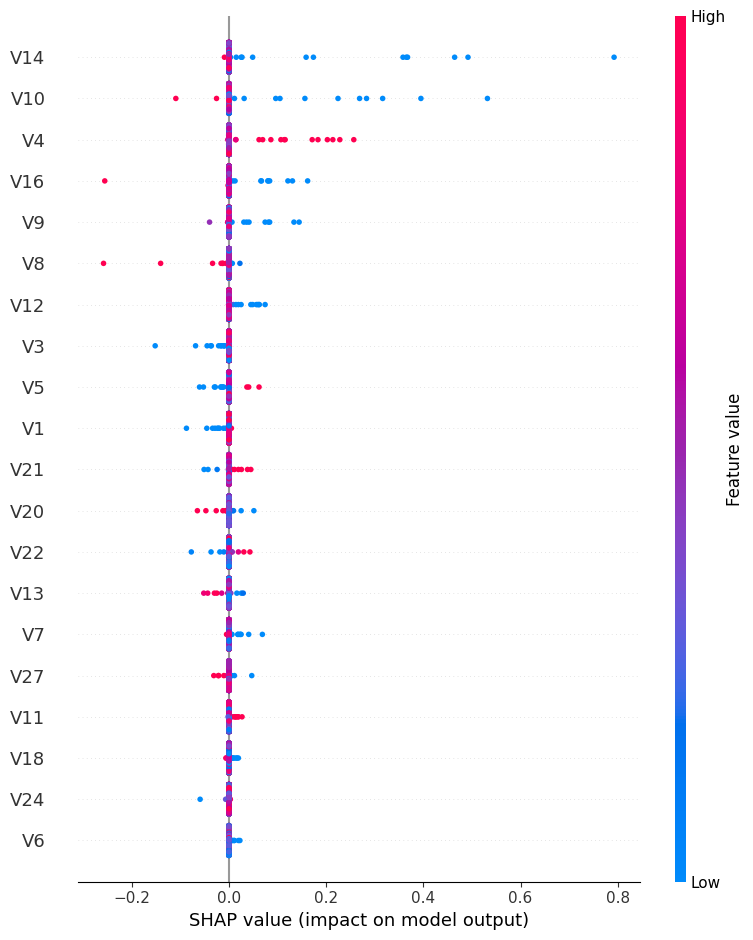

In [18]:
import shap

sample = x_train.sample(n=5000, random_state=42)
# Explain model predictions
explainer = shap.Explainer(log_reg.predict, sample)
shap_values = explainer(sample)

# Summary plot
shap.summary_plot(shap_values, sample)

In [ ]:
import joblib


joblib.dump(log_reg,'credit_logisticreg.pkl')
joblib.dump(dec_tre,'credit_decisiontree.pkl')

['credit_decisiontree.pkl']